## DAI ModelDiagnostics
API Document: https://docs.h2o.ai/driverless-ai/pyclient/docs/html/api/model_diagnostics.html  
Examples: https://docs.h2o.ai/driverless-ai/pyclient/docs/html/examples/model-diagnostics.html

In [28]:
import driverlessai
#from vega import Vega

driverlessai.__version__

'1.10.7'

In [2]:
# Driverless AIサーバーへの接続 （DAI 1.10.7）
dai = driverlessai.Client(address='http://18.143.93.66:12345', username='yuki', password='yuki')
dai

<class 'driverlessai._core.Client'> http://18.143.93.66:12345

In [3]:
# 接続先Driverless AIのDatasets
dai.datasets.list()

    | Type    | Key                                  | Name
----+---------+--------------------------------------+------------------------
  0 | Dataset | 7f133952-513b-11ef-8970-0242ac110002 | TitanicData2.csv.test
  1 | Dataset | 7f12e3f8-513b-11ef-8970-0242ac110002 | TitanicData2.csv.train
  2 | Dataset | 6d8b4260-513b-11ef-8970-0242ac110002 | TitanicData2.csv

In [4]:
# 特定のDatasetの取得
dataset = dai.datasets.get(dai.datasets.list()[0].key)     # TitanicData2.csv.testを取得
type(dataset)

driverlessai._datasets.Dataset

In [5]:
# 接続先Driverless AIのExperiments
dai.experiments.list()

    | Type       | Key                                  | Name
----+------------+--------------------------------------+-----------------
  0 | Experiment | 9d52d684-513b-11ef-8970-0242ac110002 | titanic-default

In [6]:
# 特定のExperimentの取得
experiment = dai.experiments.get(key=dai.experiments.list()[0].key)     # titanic-defaultを取得
type(experiment)

driverlessai._experiments.Experiment

### ModelDiagnostics

In [15]:
dai.model_diagnostics

In [19]:
# 接続先Driverless AIのDiagnostics
dai.model_diagnostics.list()

    | Type   | Key   | Name
----+--------+-------+--------

In [20]:
# Model Diagnosticの実行
diagnose = dai.model_diagnostics.create(
    diagnose_experiment=experiment,     # 上で取得したExperimentオブジェクト - 評価対象のExperiment
    test_dataset=dataset,                           # 上で取得したDatasetオブジェクト - 精度を評価するテストデータ
)

Complete 100.00% - Click to open diagnostic


In [21]:
diagnose

<class 'ModelDiagnostic'> 8d356ec0-5ab3-11ef-ac0a-0242ac110002 mutugesu

In [22]:
# 接続先Driverless AIのDiagnostics（実行後の再確認）
dai.model_diagnostics.list()

    | Type            | Key                                  | Name
----+-----------------+--------------------------------------+----------
  0 | ModelDiagnostic | 8d356ec0-5ab3-11ef-ac0a-0242ac110002 | mutugesu

【作成したDiagnostic】
<img src="img/diagnostic.png" width=800px>

In [23]:
diagnose.scores

{'ACCURACY': {'score': 0.7862595419847328,
  'mean': 0.799618320610687,
  'sd': 0.0207363523663487},
 'AUC': {'score': 0.8125308641975308,
  'mean': 0.816266974299115,
  'sd': 0.034451571575091836},
 'AUCPR': {'score': 0.7630965707080924,
  'mean': 0.7625004432170659,
  'sd': 0.0429111899506172},
 'F05': {'score': 0.7705479452054794,
  'mean': 0.7790614173702265,
  'sd': 0.030022907324331067},
 'F1': {'score': 0.7075471698113207,
  'mean': 0.7160964636328228,
  'sd': 0.03266713614873039},
 'F2': {'score': 0.7704654895666132,
  'mean': 0.7958648433707989,
  'sd': 0.024422422321526832},
 'FDR': {'score': 0.33035714285714285,
  'mean': 0.32201966205447075,
  'sd': 0.06076998981545926},
 'FNR': {'score': 0.25,
  'mean': 0.24998706524451325,
  'sd': 0.07471918350306198},
 'FOR': {'score': 0.16666666666666666,
  'mean': 0.15321184741650218,
  'sd': 0.02649411019261685},
 'FPR': {'score': 0.22839506172839505,
  'mean': 0.2220481489821421,
  'sd': 0.07512861962636051},
 'GINI': {'score': 0.625

In [24]:
metric_plots = diagnose.metric_plots
metric_plots

/var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/ipykernel_5728/3067546825.py:1: UserWarning: 'ModelDiagnostic.metric_plots' is a beta API that is subject to future changes.
  metric_plots = diagnose.metric_plots


In [25]:
type(metric_plots)

driverlessai._model_diagnostics.ModelDiagnosticMetricPlots

In [26]:
metric_plots.roc_curve    # vega-lite/v3 形式

{'title': 'ROC Curve',
 'schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'layer': [{'data': {'values': [{'False Positive Rate': 1.0,
      'True Positive Rate': 1.0},
     {'False Positive Rate': 1.0, 'True Positive Rate': 1.0},
     {'False Positive Rate': 0.9938271604938271, 'True Positive Rate': 0.99},
     {'False Positive Rate': 0.9691358024691358, 'True Positive Rate': 0.99},
     {'False Positive Rate': 0.9567901234567902, 'True Positive Rate': 0.99},
     {'False Positive Rate': 0.9382716049382716, 'True Positive Rate': 0.99},
     {'False Positive Rate': 0.9259259259259259, 'True Positive Rate': 0.99},
     {'False Positive Rate': 0.9135802469135802, 'True Positive Rate': 0.98},
     {'False Positive Rate': 0.9012345679012346, 'True Positive Rate': 0.98},
     {'False Positive Rate': 0.8827160493827161, 'True Positive Rate': 0.98},
     {'False Positive Rate': 0.8765432098765432, 'True Positive Rate': 0.97},
     {'False Positive Rate': 0.8641975308641975, 'True P

In [51]:
## 参考：https://github.com/jupyterlab/jupyterlab/tree/main/examples/vega ##
from IPython.display import display
def VegaLite_display(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

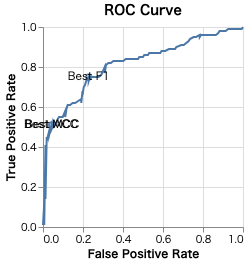

In [30]:
VegaLite_display(metric_plots.roc_curve)

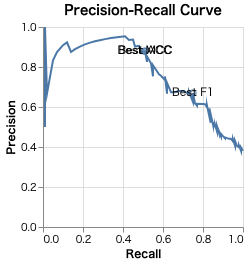

In [31]:
VegaLite_display(metric_plots.prec_recall_curve)

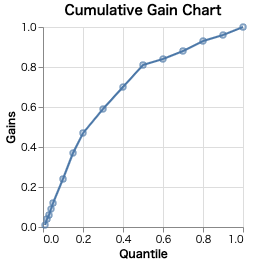

In [32]:
VegaLite_display(metric_plots.gains_chart)

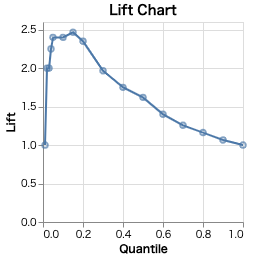

In [33]:
VegaLite_display(metric_plots.lift_chart)

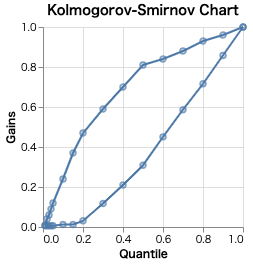

In [40]:
VegaLite_display(metric_plots.ks_chart)

In [48]:
metric_plots.confusion_matrix()

[['', '0', '1', 'Total', 'Error'],
 ['0', 125, 37, 162.0, 0.2284],
 ['1', 25, 75, 100.0, 0.25],
 ['Total', 150.0, 112.0, 262.0],
 ['Error', 0.1667, 0.3304, '', 0.2366]]

In [50]:
metric_plots.confusion_matrix(threshold=0.5)   # !!! 上記と表示が変わらない.おそらくバグ !!!

[['', '0', '1', 'Total', 'Error'],
 ['0', 125, 37, 162.0, 0.2284],
 ['1', 25, 75, 100.0, 0.25],
 ['Total', 150.0, 112.0, 262.0],
 ['Error', 0.1667, 0.3304, '', 0.2366]]

【Confusion Matrix - Threshold=0.5】  
<img src="img/cm.png" width=600px>